This notebook serves as a way to generate the plots necessary for analysis of OTU data. First, we use a standard dataframe analysis package known as "pandas".

In [1]:
import pandas as pd

Excel is not a preferred format, so convert to csv and then read in.

In [2]:
df = pd.read_csv('otu_taxa_table.csv')

Take a look at the dataframe to see what we have.

In [3]:
df

,OTU_ID,ekb-w1,grd-w1,ekb-w2,grd-w2,taxonomy
0,OTU24,8133,9240,18,5,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...
1,OTU15,85,4,3812,5707,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...
2,OTU36,4215,2843,487,1062,k__Bacteria;p__Bacteroidetes;c__Flavobacteriia...
3,OTU35,1872,4210,109,172,k__Bacteria;p__Proteobacteria;c__Alphaproteoba...
4,OTU33,94,60,2850,2803,k__Bacteria;p__Actinobacteria;c__Actinobacteri...
...,...,...,...,...,...,...
1194,OTU1031,0,0,0,3,k__Bacteria;p__Proteobacteria;c__Alphaproteoba...
1195,OTU1021,0,3,0,0,k__Bacteria;p__Bacteroidetes;c__Flavobacteriia...
1196,OTU950,0,3,0,0,k__Bacteria;p__Proteobacteria;c__Alphaproteoba...
1197,OTU878,0,3,0,0,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...


Everything look straightforward except for taxonomy. What is going on there? Let's look at the first entry to see what's going on.

In [4]:
print(df['taxonomy'][0])

k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Moraxellaceae;g__Acinetobacter;s__johnsonii


Oh! We have all the taxonomic classifications squashed into one cell. Well, let's separate them out, shall we?

In [5]:
df["Kingdom"] = None
df["Phylum"] = None
df["Class"] = None
df["Order"] = None
df["Family"] = None
df["Genus"] = None
df["Species"] = None

In [6]:
for ind,instance in enumerate(df['taxonomy']):
    taxo = instance
    array_of_taxo = taxo.split(';')
    for thing in array_of_taxo:
        divide = thing.split('__')
        if divide[0] == 'k':
            df.at[ind,'Kingdom'] = str(divide[1])
        if divide[0] == 'p':
            df.at[ind,'Phylum'] = str(divide[1])
        if divide[0] == 'c':
            df.at[ind,'Class'] = str(divide[1])
        if divide[0] == 'o':
            df.at[ind,'Order'] = str(divide[1])
        if divide[0] == 'f':
            df.at[ind,'Family'] = str(divide[1])
        if divide[0] == 'g':
            df.at[ind,'Genus'] = str(divide[1])
        if divide[0] == 's':
            df.at[ind,'Species'] = str(divide[1])
        

Now, let's re-examine the dataframe with everything separated out to see if it makes more sense.

In [7]:
df

,OTU_ID,ekb-w1,grd-w1,ekb-w2,grd-w2,taxonomy,Kingdom,Phylum,Class,Order,Family,Genus,Species
0,OTU24,8133,9240,18,5,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...,Bacteria,Proteobacteria,Gammaproteobacteria,Pseudomonadales,Moraxellaceae,Acinetobacter,johnsonii
1,OTU15,85,4,3812,5707,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...,Bacteria,Proteobacteria,Gammaproteobacteria,Oceanospirillales,Oceanospirillaceae,,
2,OTU36,4215,2843,487,1062,k__Bacteria;p__Bacteroidetes;c__Flavobacteriia...,Bacteria,Bacteroidetes,Flavobacteriia,Flavobacteriales,Flavobacteriaceae,Flavobacterium,
3,OTU35,1872,4210,109,172,k__Bacteria;p__Proteobacteria;c__Alphaproteoba...,Bacteria,Proteobacteria,Alphaproteobacteria,Rhodobacterales,Rhodobacteraceae,Rhodobacter,
4,OTU33,94,60,2850,2803,k__Bacteria;p__Actinobacteria;c__Actinobacteri...,Bacteria,Actinobacteria,Actinobacteria,Actinomycetales,Microbacteriaceae,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,OTU1031,0,0,0,3,k__Bacteria;p__Proteobacteria;c__Alphaproteoba...,Bacteria,Proteobacteria,Alphaproteobacteria,Rhodobacterales,Rhodobacteraceae,None,None
1195,OTU1021,0,3,0,0,k__Bacteria;p__Bacteroidetes;c__Flavobacteriia...,Bacteria,Bacteroidetes,Flavobacteriia,Flavobacteriales,Flavobacteriaceae,None,None
1196,OTU950,0,3,0,0,k__Bacteria;p__Proteobacteria;c__Alphaproteoba...,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,None,None,None
1197,OTU878,0,3,0,0,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,None,None


Great! One thing we might want to do is look at the most common classifications. We'll do that by sorting.

In [8]:
df.sort_values(['ekb-w1','grd-w1','ekb-w2','grd-w2'], ascending=[False, False, False, False])

,OTU_ID,ekb-w1,grd-w1,ekb-w2,grd-w2,taxonomy,Kingdom,Phylum,Class,Order,Family,Genus,Species
0,OTU24,8133,9240,18,5,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...,Bacteria,Proteobacteria,Gammaproteobacteria,Pseudomonadales,Moraxellaceae,Acinetobacter,johnsonii
2,OTU36,4215,2843,487,1062,k__Bacteria;p__Bacteroidetes;c__Flavobacteriia...,Bacteria,Bacteroidetes,Flavobacteriia,Flavobacteriales,Flavobacteriaceae,Flavobacterium,
3,OTU35,1872,4210,109,172,k__Bacteria;p__Proteobacteria;c__Alphaproteoba...,Bacteria,Proteobacteria,Alphaproteobacteria,Rhodobacterales,Rhodobacteraceae,Rhodobacter,
11,OTU88,1168,1300,2,0,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...,Bacteria,Proteobacteria,Gammaproteobacteria,Pseudomonadales,Pseudomonadaceae,Pseudomonas,
18,OTU56,1135,966,5,3,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...,Bacteria,Proteobacteria,Gammaproteobacteria,Aeromonadales,Aeromonadaceae,Tolumonas,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166,OTU1125,0,0,0,3,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...,Bacteria,Proteobacteria,Gammaproteobacteria,Alteromonadales,OM60,None,None
1167,OTU1149,0,0,0,3,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Porphyromonadaceae,Paludibacter,
1182,OTU1110,0,0,0,3,k__Bacteria;p__GN02;c__BD1-5;o__;f__;g__;s__,Bacteria,GN02,BD1-5,,,,
1194,OTU1031,0,0,0,3,k__Bacteria;p__Proteobacteria;c__Alphaproteoba...,Bacteria,Proteobacteria,Alphaproteobacteria,Rhodobacterales,Rhodobacteraceae,None,None


And what if we wanted to know all the Phylum that have been identified?

In [9]:
print(df['Phylum'].unique())

['Proteobacteria' 'Bacteroidetes' 'Actinobacteria' 'Cyanobacteria' None
 'Firmicutes' 'Fusobacteria' 'Planctomycetes' 'Verrucomicrobia'
 'Synergistetes' 'Tenericutes' 'TM6' 'Acidobacteria' 'TM7' 'WWE1'
 'Chloroflexi' 'OD1' 'Thermotogae' 'WS3' 'Chlorobi' 'GN02' 'WPS-2' 'SR1'
 'SAR406' 'Fibrobacteres' '' 'Caldiserica']


You can do some data exploration, if you'd like. How many OTUs are not classified as bacteria?

In [12]:
sum(df['ekb-w1'][df['Kingdom'] != 'Bacteria'])

439

And how many are classified as bacteria?

In [13]:
sum(df['ekb-w1'][df['Kingdom'] == 'Bacteria'])

49977

Let's do some visualizations. Here are a few standard packages and one that you may have to download via pip: distinctipy. This gives high-contrast colors

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from distinctipy import distinctipy

Now here is a function that takes a dataframe (df) that has the format provided, considers a certain number of sample columns in it (ncol), and produces a relative bar graph of a particular taxonomic level (taxa). You must specify the number of unique identified taxa you would like to have represaented in the bar graph (n). All remaining classifications will be assigned either to "unclassified" (if there is no designation provided) or "other" (if there is and the number present in the samples are just too small to be included in n.

In [183]:
def plot_rel_abundances(df,ncol,taxa,num):
    columns = df.columns
    labels = columns[1:ncol+1]
    colors = distinctipy.get_colors(num+2)
    unique_things = df[taxa].unique()
    unique_things = unique_things[unique_things != np.array(None)]
    unique_things = unique_things[unique_things != '']
    unique_things = np.append(unique_things, 'Unclassified')

    ysum = np.zeros(ncol)
    yother = np.zeros(ncol)
    y = np.zeros(ncol)
    
    fig = plt.figure()
    ax = plt.subplot(111)

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    

    for ind,thing in enumerate(unique_things):
        if ind < num:
            if thing != 'Unclassified':
                for n,label in enumerate(labels):
                    y[n] = sum(df[label][df[taxa] == thing])/sum(df[label])
            else:
                for n, label in enumerate(labels):
                    y[n] = 1.0-ysum[n]
            ax.bar(labels, y, bottom=ysum, color=colors[ind])
            for n, label in enumerate(labels):
                ysum[n] += y[n]
        else:
            unique_things = np.append(unique_things[0:num],['Other','Unclassified'])
            if thing != 'Unclassified':
                for n, label in enumerate(labels):
                    yother[n] += sum(df[label][df[taxa] == thing])/sum(df[label])
                continue
            else:
                for n, label in enumerate(labels):
                    y[n] = yother[n]
                ax.bar(labels, y, bottom=ysum, color=colors[num])
                for n, label in enumerate(labels):
                    ysum[n] += y[n]
                    y[n] = 1.0-ysum[n]
                ax.bar(labels, y, bottom=ysum, color=colors[num+1])
    # plot bars in stack manner
    ax.set_ylabel("Relative")
    # Put a legend to the right of the current axis
    ax.legend(unique_things, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

Let's see how that works

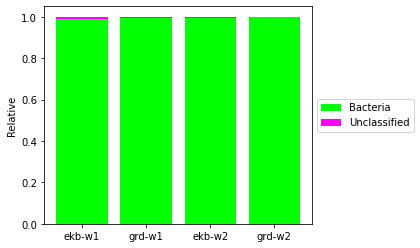

In [184]:
plot_rel_abundances(df,4,'Kingdom',100)

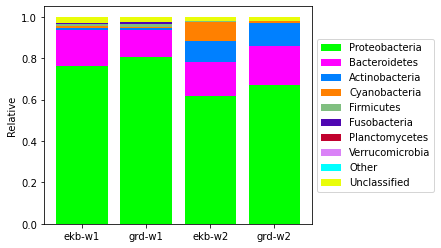

In [185]:
plot_rel_abundances(df,4,'Phylum',8)

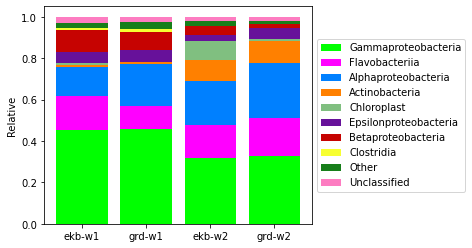

In [186]:
plot_rel_abundances(df,4,'Class',8)

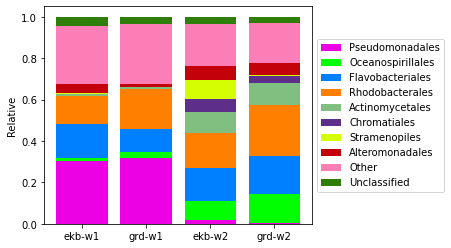

In [187]:
plot_rel_abundances(df,4,'Order',8)

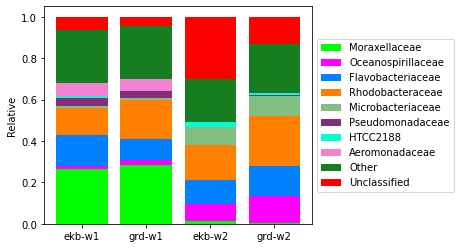

In [188]:
plot_rel_abundances(df,4,'Family',8)

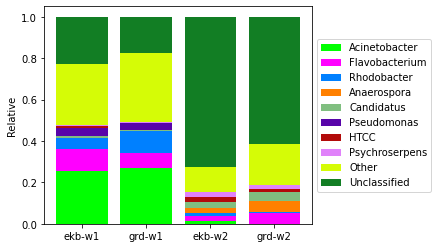

In [189]:
plot_rel_abundances(df,4,'Genus',8)

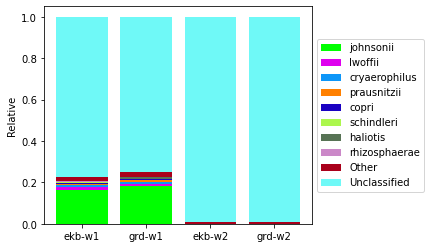

In [190]:
plot_rel_abundances(df,4,'Species',8)

The next step is to produce a function that will plot the Principle Coordinate Analysis using the Skbio package (which can be installed with conda). First a Bray-Curtis Distance Matrix is calculated and then the PCoA eigenvectors and eigenvalues are calculated. The two most significant eigenvalues (labeled PC1 and PC2) are then plotted with the magnitude of each sample's projection onto the coordinate indicated in the scatterplot. More advanced color-coding is possible, but may benefit from application via the UPGMA tree below.

In [27]:
def plot_pcoa(df,ncol):
    from skbio.diversity import beta_diversity
    from skbio.stats.ordination import pcoa
    columns = df.columns
    labels = columns[1:ncol+1]
    data = df[labels]
    data_T = data.T
    ids = list(labels)
    bc_dm = beta_diversity("braycurtis",data_T, ids)
    bc_pc = pcoa(bc_dm)
    xvals = bc_pc.samples['PC1']
    yvals = bc_pc.samples['PC2']
    for ind in range(0,ncol):
        plt.scatter(xvals[ind],yvals[ind],
            label=ids[ind])
    plt.xlabel("PC1 "+str(round(100*bc_pc.proportion_explained[0],2))+' % variance explained')
    plt.ylabel("PC2 "+str(round(100*bc_pc.proportion_explained[1],2))+' % variance explained')
    null = plt.legend()

Let's just look at where the different projected magnitudes are for the dataframe.

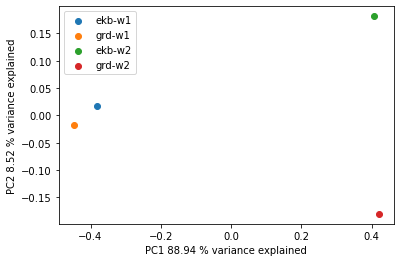

In [28]:
plot_pcoa(df,4)

Let's recreate the distance matrix from the above analysis.

In [33]:
from skbio.diversity import beta_diversity

ncol = 4
columns = df.columns
labels = columns[1:ncol+1]
data = df[labels]
data_T = data.T
ids = list(labels)
bc_dm = beta_diversity("braycurtis",data_T, ids)

Now we would like to create some data products that can be read in by our tree-generating code ETE3 (which you will need to install as a separate environment for conda)

In [103]:
def create_bio_cluster_matrix(bc_dm,ncol):
    np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
    return_list = []
    for ind in range(0,ncol):
        array = bc_dm[ind]
        array_trunc = array[0:ind]
        return_list.append(array_trunc)
    return np.array(return_list)

def create_bio_cluster_conden(bc_dm,ncol):
    np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
    return_list = np.array([])
    for ind in range(0,ncol):
        array = bc_dm[ind]
        array_trunc = array[0:ind]
        return_list = np.append(return_list,array_trunc.flatten())
        return_list = np.array(return_list)
        return_list = return_list.flatten()
    return return_list

[[0.         0.21042923 0.81472152 0.83082752]
 [0.21042923 0.         0.88114884 0.88723818]
 [0.81472152 0.88114884 0.         0.36202793]
 [0.83082752 0.88723818 0.36202793 0.        ]]
[0.21042923 0.81472152 0.88114884 0.83082752 0.88723818 0.36202793]


Time to generate some UPGMA trees. To do this, we will use the average function in the cluster package of scipy along with the distance matrix we generated above. Then we will generate a tree using the skbio package which needs to be saved in the external file format ".ph". This file can then be read into ete3 for visualization. We will color code each child differently to get a better sense of the clustering.

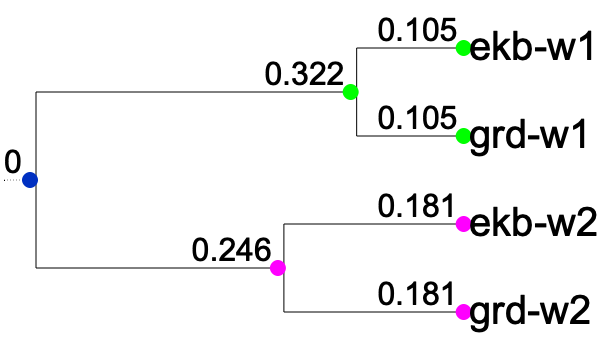

In [176]:
import ete3
from skbio import TreeNode
from scipy.cluster.hierarchy import average
from colormap import rgb2hex
dm = create_bio_cluster_conden(bc_dm,4)
lm = average(dm)
upgma_tree = TreeNode.from_linkage_matrix(lm, ids)
upgma_tree_fp = 'new.upgma.ph'
upgma_tree.write(upgma_tree_fp)
ts = ete3.TreeStyle()
ts.scale =  900
ts.show_leaf_name = True
ts.show_branch_length = True
ts.show_branch_support = False
ts.branch_vertical_margin = 10
ts.show_scale = False
ts.scale =  240 # 120 pixels per branch length unit
t=ete3.Tree(upgma_tree_fp, format=1)

children = t.children
colors = distinctipy.get_colors(len(children))
for ind,child in enumerate(children):
    for n in child.traverse():
        nstyle = ete3.NodeStyle()
        thruple = colors[ind]
        color = rgb2hex(int(255*thruple[0]),int(255*thruple[1]),int(255*thruple[2]))
        nstyle["fgcolor"] = color
        n.set_style(nstyle)

t.render("%%inline", units="in",h=4, tree_style=ts)
